# Campo magnetico de la tierra
## grafica 1

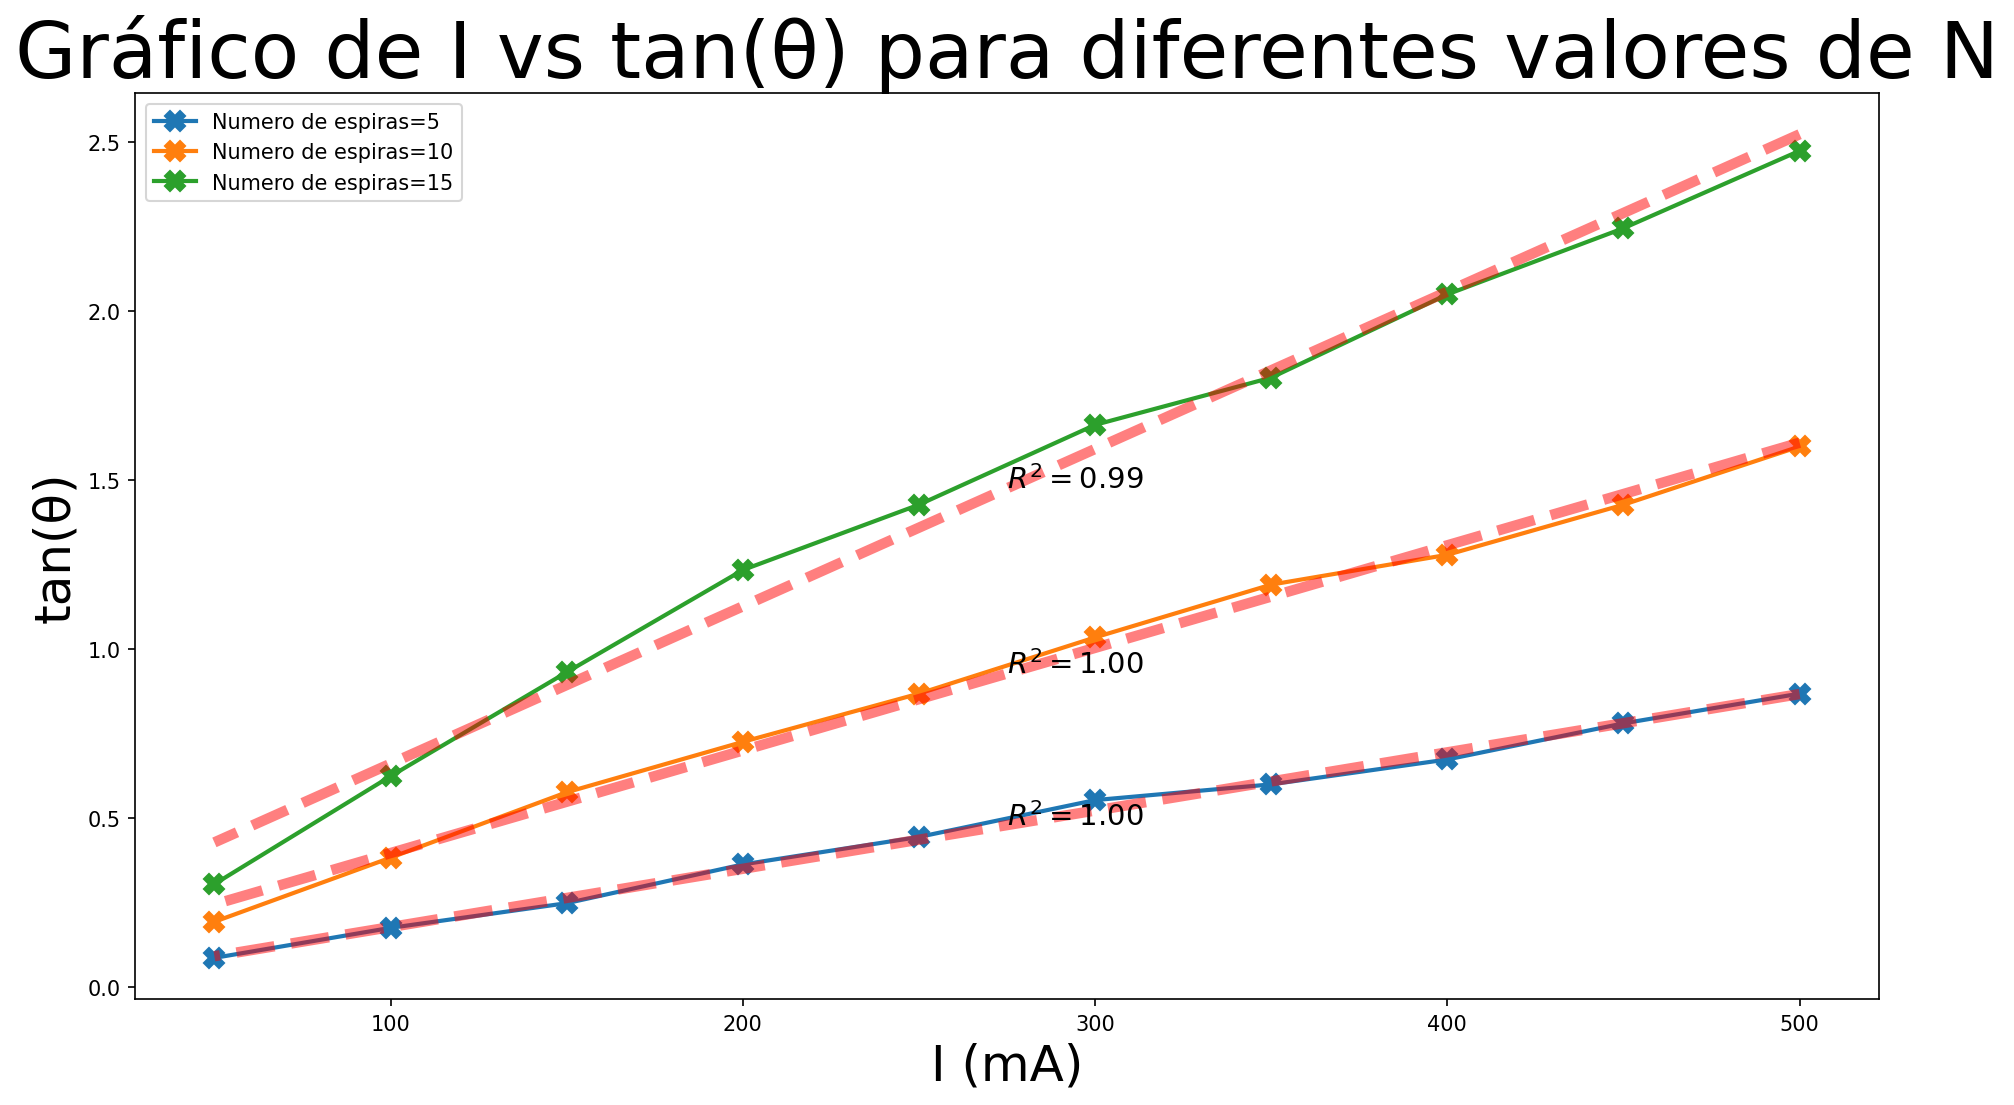

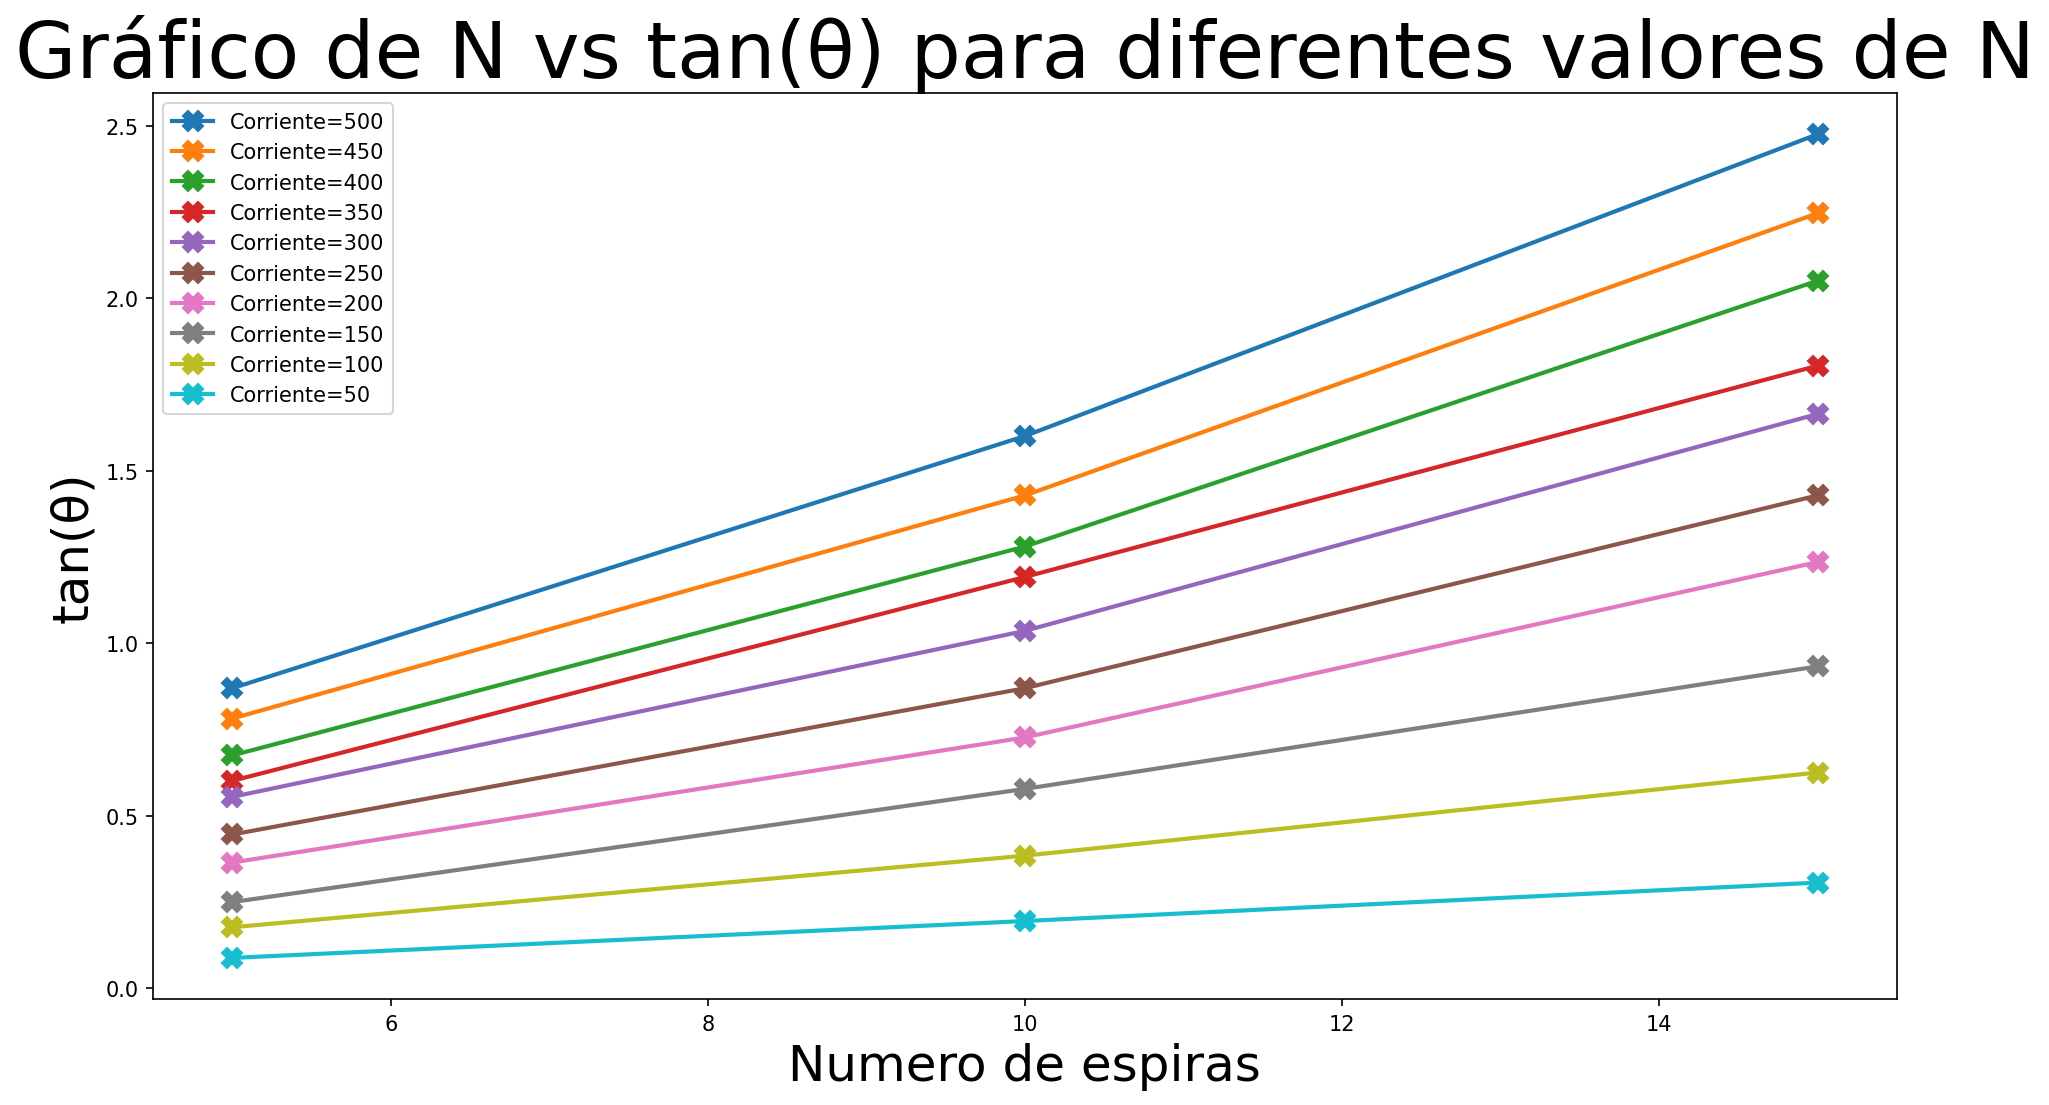

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer el archivo CSV
datos = pd.read_csv("datos.csv")

# Crear una figura y un eje
fig, ax = plt.subplots(figsize =(15,8), dpi=150)

# Filtrar y graficar los datos para cada valor de N
for N in datos['N'].unique():
    subset = datos[datos['N'] == N]
    ax.plot(subset['I (mA)'], np.tan(np.radians(subset['θ (grados)'])), label=f'Numero de espiras={N}',
            lw=2,
            marker='X',
            markersize=10)
    
    # Ajustar una línea de tendencia
    coeficientes = np.polyfit(subset['I (mA)'], np.tan(np.radians(subset['θ (grados)'])), 1)
    polinomio = np.poly1d(coeficientes)
    tendencia = polinomio(subset['I (mA)'])

    # Calcular R^2
    ss_res = np.sum((np.tan(np.radians(subset['θ (grados)'])) - tendencia) ** 2)
    ss_tot = np.sum((np.tan(np.radians(subset['θ (grados)'])) - np.mean(np.tan(np.radians(subset['θ (grados)'])))) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    # Graficar la línea de tendencia
    ax.plot(subset['I (mA)'], tendencia, linestyle='--', color='red',  lw= 5, alpha= 0.5)

    # Mostrar el valor de R^2 en el gráfico
    ax.text(subset['I (mA)'].mean(), tendencia.mean(), f'$R^2={r2:.2f}$', color='black', fontsize=14, fontweight='bold')

# Añadir etiquetas y título
ax.set_xlabel('I (mA)', fontsize=24)
ax.set_ylabel('tan(θ)', fontsize=24)
ax.set_title('Gráfico de I vs tan(θ) para diferentes valores de N', fontsize=38)
ax.legend()

#nuevo grafico
fig, ax = plt.subplots(figsize =(15,8), dpi=150)

# Filtrar y graficar los datos para cada valor de N
for I in datos['I (mA)'].unique():
    subset = datos[datos['I (mA)'] == I]
    ax.plot(subset['N'], np.tan(np.radians(subset['θ (grados)'])), label=f'Corriente={I}',
            lw=2,
            marker='X',
            markersize=10)

# Añadir etiquetas y título
ax.set_xlabel('Numero de espiras', fontsize=24)
ax.set_ylabel('tan(θ)', fontsize=24)
ax.set_title('Gráfico de N vs tan(θ) para diferentes valores de N', fontsize=38)
ax.legend()


# Mostrar el gráfico
plt.show()



## aproximacion


In [13]:
for i in range(datos['N'].size):

    print(i+1,"tangente:",round(np.tan(np.radians(datos.iloc[i]))["θ (grados)"],3), "aprox:",(datos.iloc[i]['I (mA)']*datos.iloc[i]['N'])/10000)

1 tangente: 0.869 aprox: 0.25
2 tangente: 0.781 aprox: 0.225
3 tangente: 0.675 aprox: 0.2
4 tangente: 0.601 aprox: 0.175
5 tangente: 0.554 aprox: 0.15
6 tangente: 0.445 aprox: 0.125
7 tangente: 0.364 aprox: 0.1
8 tangente: 0.249 aprox: 0.075
9 tangente: 0.176 aprox: 0.05
10 tangente: 0.087 aprox: 0.025
11 tangente: 1.6 aprox: 0.5
12 tangente: 1.428 aprox: 0.45
13 tangente: 1.28 aprox: 0.4
14 tangente: 1.192 aprox: 0.35
15 tangente: 1.036 aprox: 0.3
16 tangente: 0.869 aprox: 0.25
17 tangente: 0.727 aprox: 0.2
18 tangente: 0.577 aprox: 0.15
19 tangente: 0.384 aprox: 0.1
20 tangente: 0.194 aprox: 0.05
21 tangente: 2.475 aprox: 0.75
22 tangente: 2.246 aprox: 0.675
23 tangente: 2.05 aprox: 0.6
24 tangente: 1.804 aprox: 0.525
25 tangente: 1.664 aprox: 0.45
26 tangente: 1.428 aprox: 0.375
27 tangente: 1.235 aprox: 0.3
28 tangente: 0.933 aprox: 0.225
29 tangente: 0.625 aprox: 0.15
30 tangente: 0.306 aprox: 0.075


## Campo terrerstre


In [54]:
def campoTerrestre(N,I_mA,angulo):
    mu_0 = 4 * np.pi * 10**-7  # Permeabilidad magnética en el vacío (H/m)
    R = 0.12
    I = I_mA/1000
    resultado = (mu_0 * N * I) / (np.tan(np.radians(angulo))*2 * R)
    return resultado

campoT =[]
for i in range(datos['N'].size):
    actual = datos.iloc[i]
    valor = round(campoTerrestre(actual['N'],actual['I (mA)'],actual['θ (grados)']),8)
    campoT.append(valor)

print(campoT)
promedio = np.mean(campoT)
print(promedio)

[1.506e-05, 1.508e-05, 1.553e-05, 1.525e-05, 1.417e-05, 1.47e-05, 1.439e-05, 1.575e-05, 1.485e-05, 1.496e-05, 1.636e-05, 1.65e-05, 1.636e-05, 1.538e-05, 1.517e-05, 1.506e-05, 1.441e-05, 1.36e-05, 1.364e-05, 1.347e-05, 1.587e-05, 1.574e-05, 1.532e-05, 1.524e-05, 1.416e-05, 1.375e-05, 1.272e-05, 1.263e-05, 1.257e-05, 1.284e-05]
1.4684333333333333e-05
